In [1]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sivasubramanianss40","key":"ffdb5dadbe7d15db6b3aa8a41b97afb7"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!pip install kaggle

In [6]:
!kaggle datasets download -d lukechugh/best-alzheimer-mri-dataset-99-accuracy

Dataset URL: https://www.kaggle.com/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy
License(s): ODbL-1.0
 84% 60.0M/71.5M [00:00<00:00, 151MB/s]
100% 71.5M/71.5M [00:00<00:00, 100MB/s]


In [7]:
!unzip best-alzheimer-mri-dataset-99-accuracy.zip -d alzheimers_data

Streaming output truncated to the last 5000 lines.
  inflating: alzheimers_data/Combined Dataset/train/No Impairment/NoImpairment (1106).jpg  
  inflating: alzheimers_data/Combined Dataset/train/No Impairment/NoImpairment (1107).jpg  
  inflating: alzheimers_data/Combined Dataset/train/No Impairment/NoImpairment (1108).jpg  
  inflating: alzheimers_data/Combined Dataset/train/No Impairment/NoImpairment (1109).jpg  
  inflating: alzheimers_data/Combined Dataset/train/No Impairment/NoImpairment (111).jpg  
  inflating: alzheimers_data/Combined Dataset/train/No Impairment/NoImpairment (1110).jpg  
  inflating: alzheimers_data/Combined Dataset/train/No Impairment/NoImpairment (1111).jpg  
  inflating: alzheimers_data/Combined Dataset/train/No Impairment/NoImpairment (1112).jpg  
  inflating: alzheimers_data/Combined Dataset/train/No Impairment/NoImpairment (1113).jpg  
  inflating: alzheimers_data/Combined Dataset/train/No Impairment/NoImpairment (1114).jpg  
  inflating: alzheimers_data/C

In [9]:
import os
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Paths and parameters
train_dir = Path('/content/alzheimers_data/Combined Dataset/train')
img_size, batch_size, epochs = (128, 128), 32, 20


In [10]:
# Function to print the directory structure
def print_directory_structure(path, level=0):
    print('    ' * level + f'[{path.name}]')
    for item in path.iterdir():
        if item.is_dir():
            print_directory_structure(item, level + 1)
        else:
            print('    ' * (level + 1) + item.name)

print("Directory structure:")
print_directory_structure(train_dir)


Streaming output truncated to the last 5000 lines.
        ModerateImpairment (1510).jpg
        ModerateImpairment (2161).jpg
        ModerateImpairment (2543).jpg
        ModerateImpairment (424).jpg
        ModerateImpairment (2036).jpg
        ModerateImpairment (1443).jpg
        ModerateImpairment (1309).jpg
        ModerateImpairment (1526).jpg
        ModerateImpairment (937).jpg
        ModerateImpairment (2317).jpg
        ModerateImpairment (2352).jpg
        ModerateImpairment (2145).jpg
        ModerateImpairment (820).jpg
        ModerateImpairment (606).jpg
        ModerateImpairment (760).jpg
        ModerateImpairment (1304).jpg
        ModerateImpairment (1943).jpg
        ModerateImpairment (380).jpg
        ModerateImpairment (453).jpg
        ModerateImpairment (15).jpg
        ModerateImpairment (2194).jpg
        ModerateImpairment (2313).jpg
        ModerateImpairment (1383).jpg
        ModerateImpairment (1934).jpg
        ModerateImpairment (1881).jpg
        

In [11]:
# Data generators with augmentation
datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2
)
train_gen = datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='training'
)
val_gen = datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='validation'
)

print(f"Training samples: {train_gen.samples}, Validation samples: {val_gen.samples}")
print(f"Classes: {len(train_gen.class_indices)}, Class indices: {train_gen.class_indices}")


Found 8192 images belonging to 4 classes.
Found 2048 images belonging to 4 classes.
Training samples: 8192, Validation samples: 2048
Classes: 4, Class indices: {'Mild Impairment': 0, 'Moderate Impairment': 1, 'No Impairment': 2, 'Very Mild Impairment': 3}


In [12]:
# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_gen.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Train the model
history = model.fit(train_gen, epochs=epochs, validation_data=val_gen)
print("Model training completed.")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


256/256 ━━━━━━━━━━━━━━━━━━━━ 362s 1s/step - accuracy: 0.3262 - loss: 1.4227 - val_accuracy: 0.6685 - val_loss: 0.7205
Epoch 2/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 369s 1s/step - accuracy: 0.6425 - loss: 0.7587 - val_accuracy: 0.6875 - val_loss: 0.6567
Epoch 3/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.6512 - loss: 0.7047 - val_accuracy: 0.6523 - val_loss: 0.6570
Epoch 4/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.6807 - loss: 0.6641 - val_accuracy: 0.6089 - val_loss: 0.7325
Epoch 5/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.6983 - loss: 0.6222 - val_accuracy: 0.6641 - val_loss: 0.6259
Epoch 6/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.6969 - loss: 0.6391 - val_accuracy: 0.6777 - val_loss: 0.6695
Epoch 7/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.7137 - loss: 0.5971 - val_accuracy: 0.6577 - val_loss: 0.7063
Epoch 8/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.7286 - loss: 0.5669 - val_accuracy: 0.668

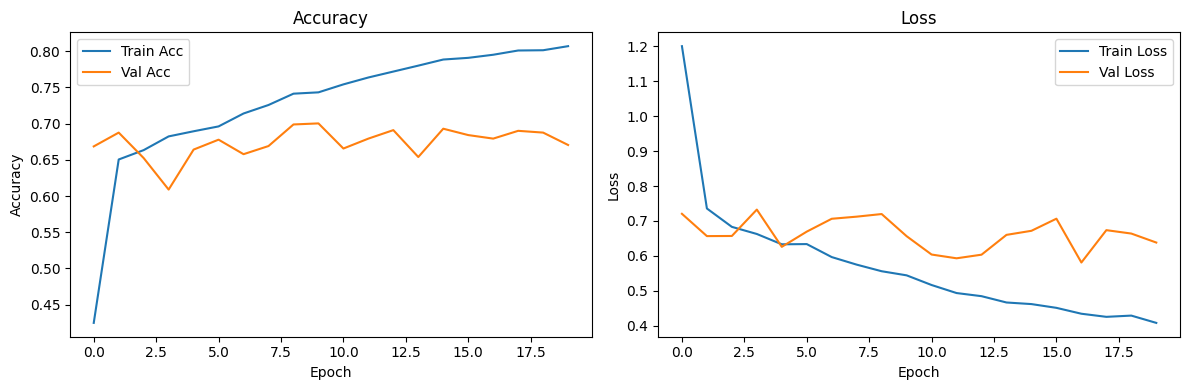

In [14]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
# Final accuracies
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

# Save model
model.save('alzheimers_mri_model.h5')
print("Model saved as 'alzheimers_mri_model.h5'")

# Print model summary
model.summary()


Final Training Accuracy: 0.8068
Final Validation Accuracy: 0.6704
Model saved as 'alzheimers_mri_model.h5'


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,915,470 (37.82 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,610,314 (25.22 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
Predicted class: Mild Impairment
Confidence: 99.09%
Accuracy of prediction: 99.09%


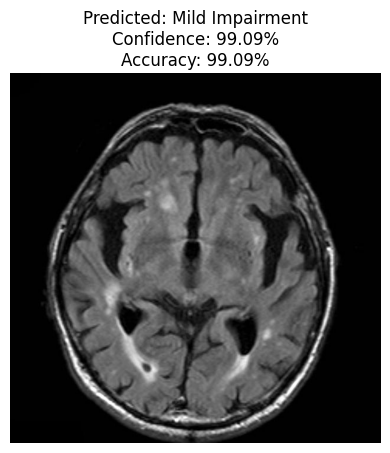

Found 1279 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 332ms/step
Overall Model Accuracy: 66.15%

Classification Report:
+----------------------+-------------+----------+------------+-----------+
| Class                | Precision   | Recall   | F1-Score   |   Support |
+======================+=============+==========+============+===========+
| Mild Impairment      | 52.46%      | 71.51%   | 60.52%     |       179 |
+----------------------+-------------+----------+------------+-----------+
| Moderate Impairment  | 80.00%      | 100.00%  | 88.89%     |        12 |
+----------------------+-------------+----------+------------+-----------+
| No Impairment        | 73.44%      | 73.44%   | 73.44%     |       640 |
+----------------------+-------------+----------+------------+-----------+
| Very Mild Impairment | 62.11%      | 52.68%   | 57.00%     |       448 |
+----------------------+-------------+----------+------------+-----------+
| macro avg            | 67.00%      | 74.41%   | 69.96%     |      1279 |
+--

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate

# Load the trained model
model_path = 'alzheimers_mri_model.h5'
model = tf.keras.models.load_model(model_path)

# Define the class names (make sure these match your training data)
class_names = ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array

def predict_image(img_path):
    preprocessed_img = preprocess_image(img_path)
    predictions = model.predict(preprocessed_img)
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    accuracy = confidence  # In this case, confidence can be interpreted as accuracy for the prediction
    return class_names[predicted_class], confidence * 100, accuracy * 100  # Convert to percentage

def display_prediction(img_path, predicted_class, confidence, accuracy):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}%\nAccuracy: {accuracy:.2f}%")
    plt.show()

# Example usage for a single image
image_path = Path('/content/Sample test.jpg')  # Replace with the path to your new image

if image_path.exists():
    predicted_class, confidence, accuracy = predict_image(image_path)
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")
    print(f"Accuracy of prediction: {accuracy:.2f}%")
    display_prediction(image_path, predicted_class, confidence, accuracy)
else:
    print(f"Image not found at {image_path}")

# Function to predict multiple images in a directory
def predict_directory(directory_path):
    directory = Path(directory_path)
    if not directory.exists() or not directory.is_dir():
        print(f"Directory not found: {directory_path}")
        return

    for img_path in directory.glob('*'):
        if img_path.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp']:
            predicted_class, confidence, accuracy = predict_image(img_path)
            print(f"Image: {img_path.name}")
            print(f"Predicted class: {predicted_class}")
            print(f"Confidence: {confidence:.2f}%")
            print(f"Accuracy of prediction: {accuracy:.2f}%")
            print("---")

# Function to calculate model accuracy on a test set
def calculate_model_accuracy(test_dir):
    test_datagen = image.ImageDataGenerator(rescale=1./255)

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    # Make predictions
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    # Calculate accuracy
    accuracy = accuracy_score(true_classes, predicted_classes) * 100  # Convert to percentage

    # Generate a classification report
    report = classification_report(true_classes, predicted_classes, target_names=class_names, output_dict=True)

    # Convert report values to percentages
    for key, value in report.items():
        if isinstance(value, dict):
            for subkey, subvalue in value.items():
                if subkey != 'support':
                    value[subkey] = subvalue * 100
        elif isinstance(value, float):
            report[key] = value * 100

    return accuracy, report

def format_classification_report(report):
    table_data = []
    headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]

    for key, value in report.items():
        if isinstance(value, dict):
            row = [key]
            row.extend([f"{value.get(metric, 'N/A'):.2f}%" if metric != 'support' else value.get(metric, 'N/A')
                        for metric in ["precision", "recall", "f1-score", "support"]])
            table_data.append(row)

    return tabulate(table_data, headers=headers, tablefmt="grid")

# Example usage for calculating model accuracy
test_dir = '/content/alzheimers_data/Combined Dataset/test'  # Replace with the path to your test data
model_accuracy, classification_rep = calculate_model_accuracy(test_dir)

print(f"Overall Model Accuracy: {model_accuracy:.2f}%")
print("\nClassification Report:")
print(format_classification_report(classification_rep))

# Example usage for predicting multiple images
# predict_directory('/path/to/your/image/directory')